#  Exploratory Analysis on which cities has the most volatile markets
### Paul Samaniego

In [2]:
import pandas as pd
import os
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import project1scripts

In [3]:
cwd = os.getcwd()
print(cwd)

C:\Users\Saman\Coolest-project-1


In [4]:
filename = "clean_median_sale_price_v2_df.csv"
df = pd.read_csv(filename, index_col=0)
df.head()

,RegionName,StateName,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,8/31/2013,...,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023
0,"New York, NY",NY,34491100.0,33935000.0,33535000.0,33351700,34200000,35600000,37100000,38066700,...,54333300,52833300,51833300,51533300,50950000,51033300,51666700,53583300,55833300,57966700
1,"Los Angeles, CA",CA,39400000.0,39733300.0,40733300.0,43066700,45066700,46500000,46833300,47166700,...,85200000,84033300,82700000,81833300,81666700,82733300,83900000,85400000,87333300,88833300
2,"Chicago, IL",IL,16283300.0,15800000.0,16021800.0,17021800,18338500,19783300,20750000,21233300,...,28500000,27833300,27333300,27000000,26900000,27563300,28730000,30030000,31316700,31983300
3,"Dallas, TX",TX,15166700.0,15216700.0,15533300.0,16450000,17280000,17846700,18163300,18112500,...,39050000,38250000,37333300,36333300,36233300,36700000,37700000,38466700,39500000,40033300
4,"Houston, TX",TX,14983300.0,14857200.0,15040500.0,16015500,16741700,17490000,17765000,17865000,...,32100000,31600000,31066700,30600000,30433300,30633300,31333300,32166700,32866700,33366700


In [5]:
#Author: anderoos
df['StateName'] = df['StateName'].astype('str')
# Define categories
northeast = ['ME', 'NH', 'VT', 'MA', 'RI', 'CT', 'NY', 'NJ', 'PA']
southeast = ['DE', 'MD', 'VA', 'WV', 'NC', 'SC', 'GA', 'FL', 'AL', 'MS', 'LA', 'KY', 'TN']
midwest = ['OH', 'IN', 'IL', 'MI', 'WI', 'MN', 'IA', 'MO', 'ND', 'SD', 'NE', 'KS']
west = ['MT', 'ID', 'WY', 'CO', 'NM', 'AZ', 'UT', 'NV', 'CA', 'OR', 'WA', 'AK', 'HI']
southwest = ['TX', 'OK', 'AR']
# Filters state codes into separate dataframes

def USRegion(value):
    if value in northeast:
        return "northeast"
    elif value in southeast:
        return "southeast"
    elif value in midwest:
        return "midwest"
    elif value in west:
        return "west"
    elif value in southwest:
        return "southwest"



df.insert(loc=0, column = "US Region", value = df["StateName"].apply(USRegion))

df.head()
    

,US Region,RegionName,StateName,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,...,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023
0,northeast,"New York, NY",NY,34491100.0,33935000.0,33535000.0,33351700,34200000,35600000,37100000,...,54333300,52833300,51833300,51533300,50950000,51033300,51666700,53583300,55833300,57966700
1,west,"Los Angeles, CA",CA,39400000.0,39733300.0,40733300.0,43066700,45066700,46500000,46833300,...,85200000,84033300,82700000,81833300,81666700,82733300,83900000,85400000,87333300,88833300
2,midwest,"Chicago, IL",IL,16283300.0,15800000.0,16021800.0,17021800,18338500,19783300,20750000,...,28500000,27833300,27333300,27000000,26900000,27563300,28730000,30030000,31316700,31983300
3,southwest,"Dallas, TX",TX,15166700.0,15216700.0,15533300.0,16450000,17280000,17846700,18163300,...,39050000,38250000,37333300,36333300,36233300,36700000,37700000,38466700,39500000,40033300
4,southwest,"Houston, TX",TX,14983300.0,14857200.0,15040500.0,16015500,16741700,17490000,17765000,...,32100000,31600000,31066700,30600000,30433300,30633300,31333300,32166700,32866700,33366700


In [6]:
df_regions = df.drop(columns=["RegionName", "StateName"])
df_regions_gb = df_regions.groupby("US Region").mean()

In [7]:
#calculating the rolling 12 month average, for the the first 11 months just doing the minimum
moving_avg_by_region_df = df_regions_gb.rolling(window=12, axis=1, min_periods=1).mean()
moving_avg_by_region_df.head()

C:\Users\Saman\AppData\Local\Temp\ipykernel_1348\4182092430.py:2: FutureWarning: Support for axis=1 in DataFrame.rolling is deprecated and will be removed in a future version. Use obj.T.rolling(...) instead
  moving_avg_by_region_df = df_regions_gb.rolling(window=12, axis=1, min_periods=1).mean()


,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,8/31/2013,9/30/2013,10/31/2013,...,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023
US Region,,,,,,,,,,,,,,,,,,,,,
midwest,1.124966e+07,1.113451e+07,1.111493e+07,1.117221e+07,1.130591e+07,1.148011e+07,1.165990e+07,1.180246e+07,1.188367e+07,1.191828e+07,...,2.003163e+07,2.013451e+07,2.021155e+07,2.026719e+07,2.031425e+07,2.037434e+07,2.044538e+07,2.052466e+07,2.060790e+07,2.069798e+07
northeast,1.610759e+07,1.591623e+07,1.579599e+07,1.579679e+07,1.592231e+07,1.612203e+07,1.633327e+07,1.650898e+07,1.661394e+07,1.666128e+07,...,2.696710e+07,2.714233e+07,2.729456e+07,2.740781e+07,2.751701e+07,2.762969e+07,2.774165e+07,2.785372e+07,2.797813e+07,2.812136e+07
southeast,1.401589e+07,1.390406e+07,1.392583e+07,1.399720e+07,1.414150e+07,1.429385e+07,1.444795e+07,1.456799e+07,1.464275e+07,1.466386e+07,...,2.749383e+07,2.769089e+07,2.783593e+07,2.795107e+07,2.804621e+07,2.813507e+07,2.821020e+07,2.827351e+07,2.834448e+07,2.844009e+07
southwest,1.234263e+07,1.231311e+07,1.233306e+07,1.244411e+07,1.258704e+07,1.275977e+07,1.293799e+07,1.308358e+07,1.316617e+07,1.318593e+07,...,2.441742e+07,2.454783e+07,2.461773e+07,2.466219e+07,2.467894e+07,2.469291e+07,2.468070e+07,2.465629e+07,2.462022e+07,2.460112e+07
west,2.138827e+07,2.143247e+07,2.151155e+07,2.172845e+07,2.198234e+07,2.222198e+07,2.241894e+07,2.257082e+07,2.269153e+07,2.277595e+07,...,5.010503e+07,5.027991e+07,5.037132e+07,5.039284e+07,5.035841e+07,5.027442e+07,5.012673e+07,4.994313e+07,4.979315e+07,4.970975e+07


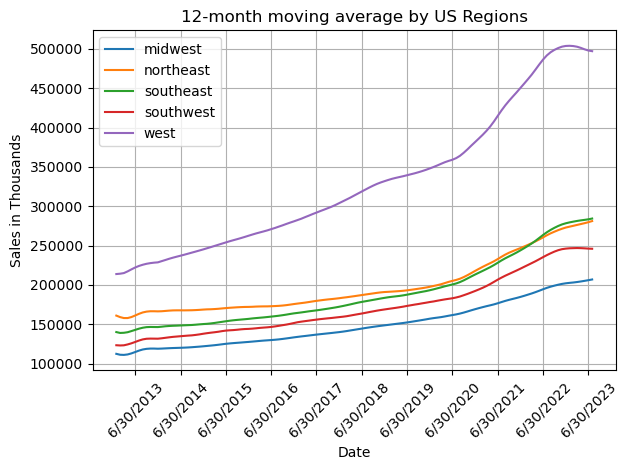

In [8]:
df_transposed = moving_avg_by_region_df.transpose()
df_transposed = df_transposed.div(100)

custom_x_ticks = ["6/30/2013", "6/30/2014", "6/30/2015","6/30/2016", "6/30/2017","6/30/2018",
                  "6/30/2019", "6/30/2020", "6/30/2021", "6/30/2022", "6/30/2023"]

for region in df_transposed.columns:
    plt.plot(df_transposed.index, df_transposed[region], label=region)

plt.title("12-month moving average by US Regions")
plt.xlabel("Date")
plt.ylabel("Sales in Thousands")
plt.legend()
plt.grid(True)
plt.xticks(custom_x_ticks, rotation=45)
plt.tight_layout()
plt.show()

In [9]:
number_of_periods = len(moving_avg_by_region_df.columns)

growth_rate_by_region = pd.DataFrame({
    "Growth Rate":((moving_avg_by_region_df["7/31/2023"] / 
                           moving_avg_by_region_df["1/31/2013"])**(12/number_of_periods)-1)
})

growth_rate_by_region.head()

,Growth Rate
US Region,
midwest,0.059301
northeast,0.054063
southeast,0.069146
southwest,0.067342
west,0.082948


In [12]:
regions_combined = growth_rate_by_region.merge(moving_avg_by_region_df[["1/31/2013", "7/31/2023"]].div(100), on="US Region", how="left")
regions_combined.head()

,Growth Rate,1/31/2013,7/31/2023
US Region,,,
midwest,0.059301,112496.571429,206979.755952
northeast,0.054063,161075.948276,281213.642241
southeast,0.069146,140158.866438,284400.938356
southwest,0.067342,123426.285714,246011.192857
west,0.082948,213882.722727,497097.530303


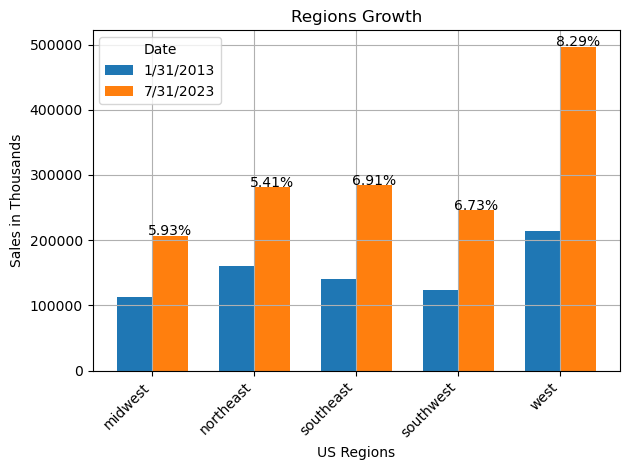

In [14]:
# Extract data
regions = regions_combined.index
values_1_31_2013 = regions_combined["1/31/2013"]
values_7_31_2023 = regions_combined["7/31/2023"]

# Define the width of each bar group
bar_width = 0.35

# Create an array of indices for x-axis positions
x_indices = np.arange(len(regions))

# Create two sets of bars for each city
plt.bar(x_indices - bar_width/2, values_1_31_2013, width=bar_width, label='1/31/2013')
plt.bar(x_indices + bar_width/2, values_7_31_2023, width=bar_width, label='7/31/2023')

# Add labels to the x-axis ticks
plt.xticks(x_indices, regions, rotation=45, ha="right")

# Display the Growth Rate values above each bar
for i, value_7_31_2023 in enumerate(values_7_31_2023):
    growth_rate = regions_combined['Growth Rate'].iloc[i]
    plt.text(x_indices[i] + bar_width/2, value_7_31_2023 + 1000, f'{growth_rate:.2%}', ha="center")

plt.xlabel("US Regions")
plt.ylabel("Sales in Thousands")
plt.title("Regions Growth")

plt.grid(True)
plt.legend(title="Date", loc="best")
plt.tight_layout()
plt.show()